In [19]:
'''A simple MLP in Keras implementing linear regression.
'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# numpy package
import numpy as np

# keras modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [2]:
# generate x data
x = np.arange(-1,1,0.2)

In [3]:
x.shape

(10,)

In [4]:
x = np.reshape(x, [-1,1])

In [5]:
x.shape

(10, 1)

In [6]:
# generate y data
y = 2 * x + 3

# True if noise is added to y
is_noisy = True

# add noise if enabled
if is_noisy:
    noise = np.random.uniform(-0.1, 0.1, x.shape)
    x = x + noise

In [8]:
# deep learning method
# build 2-layer MLP network

model = Sequential()
# 1st MLP has 8 units (perceptron), input is 1-dim
model.add(Dense(units=8, input_dim=1))
# 2nd MLP has 1 unit, output is 1-dim
model.add(Dense(units=1))
# print summary to double check the network
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


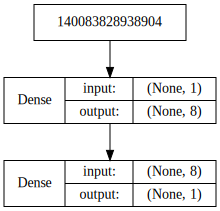

In [10]:
# create a nice image of the network model

# save to file
# plot_model(model, to_file='linear-model.png', show_shapes=True)

# or To jupyter notebook
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

def plot_keras_model(model,
                     show_shapes=True,
                     show_layer_names=True):
    return SVG(model_to_dot(model,
                            show_shapes=show_shapes,
                            show_layer_names=show_layer_names).create(prog='dot',format='svg'))

plot_keras_model(model, show_shapes=True, show_layer_names=False)

In [11]:
# indicate the loss function and use stochastic gradient descent
# (sgd) as optimizer
model.compile(loss='mse', optimizer='sgd')

# feed the network with complete dataset (1 epoch) 100 times
# batch size of sgd is 4
model.fit(x, y, epochs=100, batch_size=4)

Epoch 1/100
10/10 [==============================] - 0s 781us/step - loss: 8.5327
Epoch 2/100
10/10 [==============================] - 0s 258us/step - loss: 6.6604
Epoch 3/100
10/10 [==============================] - 0s 234us/step - loss: 5.1774
Epoch 4/100
10/10 [==============================] - 0s 240us/step - loss: 3.9312
Epoch 5/100
10/10 [==============================] - 0s 243us/step - loss: 2.9149
Epoch 6/100
10/10 [==============================] - 0s 249us/step - loss: 2.0384
Epoch 7/100
10/10 [==============================] - 0s 271us/step - loss: 1.3765
Epoch 8/100
10/10 [==============================] - 0s 270us/step - loss: 0.9257
Epoch 9/100
10/10 [==============================] - 0s 287us/step - loss: 0.5950
Epoch 10/100
10/10 [==============================] - 0s 258us/step - loss: 0.3998
Epoch 11/100
10/10 [==============================] - 0s 253us/step - loss: 0.2701
Epoch 12/100
10/10 [==============================] - 0s 242us/step - loss: 0.1646
Epoch 13/100


10/10 [==============================] - 0s 227us/step - loss: 0.0069
Epoch 100/100
10/10 [==============================] - 0s 230us/step - loss: 0.0068


In [12]:
# simple validation by predicting the output based on x
ypred = model.predict(x)

In [13]:
ypred

array([[1.0081618],
       [1.3096681],
       [1.9482937],
       [2.1696005],
       [2.7281036],
       [2.9355402],
       [3.340682 ],
       [3.74331  ],
       [4.153548 ],
       [4.6843686]], dtype=float32)

In [14]:
y

array([[1. ],
       [1.4],
       [1.8],
       [2.2],
       [2.6],
       [3. ],
       [3.4],
       [3.8],
       [4.2],
       [4.6]])

In [15]:
# linear algebra method
ones = np.ones(x.shape)

# A is the concat of x and 1s
A = np.concatenate([x,ones], axis=1)

# compute k using using pseudo-inverse
k = np.matmul(np.linalg.pinv(A), y) 

print("k (Linear Algebra Method):")
print(k)
# predict the output using linear algebra solution
yla = np.matmul(A, k)

# print ground truth, linear algebra, MLP solutions
outputs = np.concatenate([y, yla, ypred], axis=1)
print("Ground Truth, Linear Alg Prediction, MLP Prediction")
print(outputs)

k (Linear Algebra Method):
[[2.05252574]
 [3.11903007]]
Ground Truth, Linear Alg Prediction, MLP Prediction
[[1.         1.00677494 1.00816178]
 [1.4        1.30815669 1.30966806]
 [1.8        1.94651857 1.94829369]
 [2.2        2.16773384 2.16960049]
 [2.6        2.72600634 2.72810364]
 [3.         2.93335763 2.9355402 ]
 [3.4        3.33833208 3.34068203]
 [3.8        3.740794   3.74330997]
 [4.2        4.15086212 4.15354776]
 [4.6        4.68146378 4.68436861]]


In [17]:
# Uncomment to see the output for a new input data 
# that is not part of the training data.
x = np.array([2])
ypred = model.predict(x)
print(ypred) # y = 2*x +3 = 7

[[7.228037]]
